In [10]:
import xmltodict
import geopandas as gpd
from pyproj import Transformer
from shapely.ops import transform
import rasterio
from rasterio.transform import from_bounds
from rasterio.plot import show

In [2]:
file_path = "../../extract/output/wms_get_capabilities.xml"

In [3]:
with open(file_path, "r") as f:
  data = xmltodict.parse(f.read())

In [4]:
data

{'WMS_Capabilities': {'@version': '1.3.0',
  '@updateSequence': '7956',
  '@xmlns': 'http://www.opengis.net/wms',
  '@xmlns:xlink': 'http://www.w3.org/1999/xlink',
  '@xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance',
  '@xsi:schemaLocation': 'http://www.opengis.net/wms http://geoportal.jatengprov.go.id/geoserver/schemas/wms/1.3.0/capabilities_1_3_0.xsd',
  'Service': {'Name': 'WMS',
   'Title': 'GeoServer Web Map Service',
   'Abstract': 'A compliant implementation of WMS plus most of the SLD extension (dynamic styling). Can also generate PDF, SVG, KML, GeoRSS',
   'KeywordList': {'Keyword': ['WFS', 'WMS', 'GEOSERVER']},
   'OnlineResource': {'@xlink:type': 'simple',
    '@xlink:href': 'http://geoserver.org'},
   'ContactInformation': {'ContactPersonPrimary': {'ContactPerson': '(024) 8319140',
     'ContactOrganization': 'Provinsi Jawa Tengah'},
    'ContactPosition': 'Jl. Menteri Supeno 1 / 2 , Semarang 50243',
    'ContactAddress': {'AddressType': 'Jl. Menteri Supeno I / 2 Se

In [5]:
data.keys()

dict_keys(['WMS_Capabilities'])

In [6]:
list(
  data['WMS_Capabilities'].keys()
)

['@version',
 '@updateSequence',
 '@xmlns',
 '@xmlns:xlink',
 '@xmlns:xsi',
 '@xsi:schemaLocation',
 'Service',
 'Capability']

In [7]:
capabilities = data['WMS_Capabilities']

In [8]:
capabilities["Service"]

{'Name': 'WMS',
 'Title': 'GeoServer Web Map Service',
 'Abstract': 'A compliant implementation of WMS plus most of the SLD extension (dynamic styling). Can also generate PDF, SVG, KML, GeoRSS',
 'KeywordList': {'Keyword': ['WFS', 'WMS', 'GEOSERVER']},
 'OnlineResource': {'@xlink:type': 'simple',
  '@xlink:href': 'http://geoserver.org'},
 'ContactInformation': {'ContactPersonPrimary': {'ContactPerson': '(024) 8319140',
   'ContactOrganization': 'Provinsi Jawa Tengah'},
  'ContactPosition': 'Jl. Menteri Supeno 1 / 2 , Semarang 50243',
  'ContactAddress': {'AddressType': 'Jl. Menteri Supeno I / 2 Semarang',
   'Address': None,
   'City': 'Semarang',
   'StateOrProvince': 'Jawa Tengah',
   'PostCode': '50243',
   'Country': 'Indonesia'},
  'ContactVoiceTelephone': None,
  'ContactFacsimileTelephone': '(024) 8443916',
  'ContactElectronicMailAddress': 'diskominfo@jatengprov.go.id'},
 'Fees': 'NONE',
 'AccessConstraints': 'NONE'}

In [9]:
capabilities["Capability"].keys()

dict_keys(['Request', 'Exception', 'Layer'])

In [10]:
capabilities["Capability"]["Request"].keys()

dict_keys(['GetCapabilities', 'GetMap', 'GetFeatureInfo'])

In [11]:
capabilities["Capability"]["Request"]["GetMap"]["Format"]

['image/png',
 'application/atom+xml',
 'application/json;type=utfgrid',
 'application/pdf',
 'application/rss+xml',
 'application/vnd.google-earth.kml+xml',
 'application/vnd.google-earth.kml+xml;mode=networklink',
 'application/vnd.google-earth.kmz',
 'image/geotiff',
 'image/geotiff8',
 'image/gif',
 'image/jpeg',
 'image/png; mode=8bit',
 'image/svg+xml',
 'image/tiff',
 'image/tiff8',
 'image/vnd.jpeg-png',
 'text/html; subtype=openlayers']

In [12]:
capabilities["Capability"]["Request"]["GetFeatureInfo"]["Format"]

['text/plain',
 'application/vnd.ogc.gml',
 'text/xml',
 'application/vnd.ogc.gml/3.1.1',
 'text/xml; subtype=gml/3.1.1',
 'text/html',
 'application/json']

## GetFeatureInfo with different CRS

In [37]:
file_path = "../../extract/output/wms_get_featureinfo_multi.geojson"

In [41]:
gdf_multi = gpd.read_file(file_path)

gdf_multi.head()

,id,fid_batas_,a1code,a2code,a2name,a1name,kaw_bud,kode_bps,fid_dakkab,dak_kprov,dak_nprov,dak_kkab,dak_nkab,dakk,kode_dagri,coba,zona,geometry
0,adm_jateng_bts_kabupaten_kota_250k_33002019061...,209.0,33.0,3321.0,DEMAK,JAWA TENGAH,None,3321.0,203.0,33,JAWA TENGAH,21,DEMAK,3321.0,3321.0,0.0,3.0,"MULTIPOLYGON (((110.75915 -6.79155, 110.76991 ..."
1,adm_jateng_bts_kabupaten_kota_250k_33002019061...,221.0,33.0,3374.0,SEMARANG,JAWA TENGAH,None,3374.0,215.0,33,JAWA TENGAH,74,KOTA SEMARANG,3374.0,3374.0,0.0,3.0,"MULTIPOLYGON (((110.47758 -7.08543, 110.46783 ..."
2,0,NaN,NaN,NaN,None,None,Perkotaan,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((439974.28153 9217219.00003, 43..."
3,0,NaN,NaN,NaN,None,None,Perdesaan,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((446434.28153 9230299.00003, 44..."
4,0,NaN,NaN,NaN,None,None,Kawasan Pertanian Semusim Lahan Basah,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((500419.58473 9209040.07863, 50..."


In [42]:
gdf_multi.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
capabilities["Capability"]["Layer"]["Layer"][0]["CRS"]

['EPSG:4326', 'CRS:84']

In [33]:
for layer in capabilities["Capability"]["Layer"]["Layer"]:
  if "adm_jateng_bts_kabupaten_kota_250k_330020190617103125" in layer["Name"]:
    crs_adminkab = layer["CRS"][0]
  elif "kawasan_budidaya_330020190515112635" in layer["Name"]:
    crs_kws_budidaya = layer["CRS"][0]

In [35]:
crs_adminkab

'EPSG:4326'

In [36]:
crs_kws_budidaya

'EPSG:32749'

In [44]:
gdf_multi

,id,fid_batas_,a1code,a2code,a2name,a1name,kaw_bud,kode_bps,fid_dakkab,dak_kprov,dak_nprov,dak_kkab,dak_nkab,dakk,kode_dagri,coba,zona,geometry
0,adm_jateng_bts_kabupaten_kota_250k_33002019061...,209.0,33.0,3321.0,DEMAK,JAWA TENGAH,None,3321.0,203.0,33,JAWA TENGAH,21,DEMAK,3321.0,3321.0,0.0,3.0,"MULTIPOLYGON (((110.75915 -6.79155, 110.76991 ..."
1,adm_jateng_bts_kabupaten_kota_250k_33002019061...,221.0,33.0,3374.0,SEMARANG,JAWA TENGAH,None,3374.0,215.0,33,JAWA TENGAH,74,KOTA SEMARANG,3374.0,3374.0,0.0,3.0,"MULTIPOLYGON (((110.47758 -7.08543, 110.46783 ..."
2,0,NaN,NaN,NaN,None,None,Perkotaan,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((439974.28153 9217219.00003, 43..."
3,0,NaN,NaN,NaN,None,None,Perdesaan,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((446434.28153 9230299.00003, 44..."
4,0,NaN,NaN,NaN,None,None,Kawasan Pertanian Semusim Lahan Basah,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((500419.58473 9209040.07863, 50..."


In [56]:
def reproject(row):
  if row.id == "0":
    reprojected = Transformer.from_crs(crs_from=crs_kws_budidaya, crs_to=crs_adminkab, always_xy=True)
    return transform(reprojected.transform, row.geometry)
  else:
    return row.geometry

gdf_multi["geometry"] = gdf_multi.apply(reproject, axis=1)

In [ ]:
gdf_multi

,id,fid_batas_,a1code,a2code,a2name,a1name,kaw_bud,kode_bps,fid_dakkab,dak_kprov,dak_nprov,dak_kkab,dak_nkab,dakk,kode_dagri,coba,zona,geometry
0,adm_jateng_bts_kabupaten_kota_250k_33002019061...,209.0,33.0,3321.0,DEMAK,JAWA TENGAH,None,3321.0,203.0,33,JAWA TENGAH,21,DEMAK,3321.0,3321.0,0.0,3.0,"MULTIPOLYGON (((110.75915 -6.79155, 110.76991 ..."
1,adm_jateng_bts_kabupaten_kota_250k_33002019061...,221.0,33.0,3374.0,SEMARANG,JAWA TENGAH,None,3374.0,215.0,33,JAWA TENGAH,74,KOTA SEMARANG,3374.0,3374.0,0.0,3.0,"MULTIPOLYGON (((110.47758 -7.08543, 110.46783 ..."
2,0,NaN,NaN,NaN,None,None,Perkotaan,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((110.45645 -7.08139, 110.45551 ..."
3,0,NaN,NaN,NaN,None,None,Perdesaan,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((110.51507 -6.96313, 110.52028 ..."
4,0,NaN,NaN,NaN,None,None,Kawasan Pertanian Semusim Lahan Basah,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((111.0038 -7.15569, 111.00383 -..."


In [58]:
gdf_multi.to_file("../output.gpkg", layer="admin_kawasan_jateng")

## Work with WMS png

In [4]:
file_path = "../../extract/output/wms_get_map.png"

In [18]:
ds = rasterio.open(file_path)

/Users/ahmadzaenunfaiz/Documents/Faiz/GitHub/Personal Project/geocourse-data-engineering/venv/lib/python3.13/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [19]:
ds.crs

In [20]:
ds.height

800

In [21]:
ds.width

500

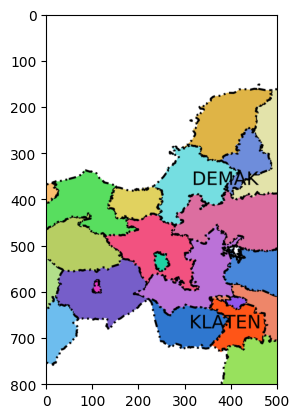

<Axes: >

In [22]:
show(ds)

In [23]:
profile = ds.profile

profile

{'driver': 'PNG', 'dtype': 'uint8', 'nodata': None, 'width': 500, 'height': 800, 'count': 3, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'blockxsize': 500, 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}

In [13]:
bbox = (110,-8,111,-6)

In [24]:
transform = from_bounds(*bbox, ds.width, ds.height)

transform

Affine(0.002, 0.0, 110.0,
       0.0, -0.0025, -6.0)

In [25]:
profile.update({
  "driver": "GTiff",
  "transform": transform,
  "crs": "EPSG:4326" 
})

In [27]:
with rasterio.open("output/georeferenced.tif", "w", **profile) as ds_georef:
  ds_georef.write(ds.read())

### Read Georeferenced Data

In [28]:
ds = rasterio.open("output/georeferenced.tif")

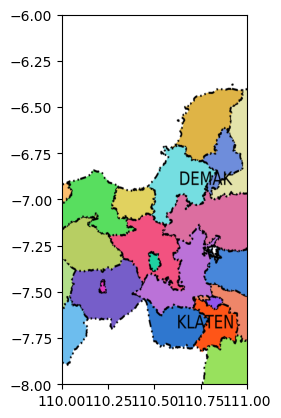

<Axes: >

In [29]:
show(ds)

In [ ]:
from osgeo import gdal

# Input and output file paths
tif_path = "output/georeferenced.tif"
gpkg_path = "test.gpkg"
layer_name = "my_raster_layer"

# Open the source raster
src_ds = gdal.Open(tif_path)

# Define the output format as GPKG
gdal.Translate(
  gpkg_path, src_ds,
  format="GPKG",
  outputSRS=src_ds.GetProjection(),
  # layerName=layer_name
)


/Users/ahmadzaenunfaiz/Documents/Faiz/GitHub/Personal Project/geocourse-data-engineering/venv/lib/python3.13/site-packages/osgeo/gdal.py:314: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


TypeError: TranslateOptions() got an unexpected keyword argument 'layerName'